In [3]:
import os
import sys
import re
from operator import itemgetter
from datetime import datetime
from langchain.document_loaders.text import TextLoader
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.embeddings import HuggingFaceEmbeddings

from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate, base, PromptTemplate
from langchain_core.output_parsers import PydanticOutputParser
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.pydantic_v1 import BaseModel, Field
from langchain.vectorstores import qdrant
from config import GPT_API
import re
from typing import Annotated, List, Dict, TypedDict
from langgraph.graph.message import add_messages, AnyMessage

os.environ["OPENAI_API_KEY"] = GPT_API
# os.environ["LANGCHAIN_API_KEY"] = LANG_SMITH

from uuid import uuid4

unique_id = uuid4().hex[0:8]
# os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
# os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_PROJECT"] = f"Tracing Walkthrough {unique_id}"
current_date = datetime.now().strftime('%B%Y')


ImportError: cannot import name 'Annotated' from 'typing' (/usr/lib/python3.8/typing.py)

In [ ]:
SET_TEMPERATURE = 0.2
MODEL = "gpt-4o-2024-05-13"#"gpt-3.5-turbo"

LLM_MODEL = ChatOpenAI(
    model=MODEL,
    name="Agent for job applications",
    temperature=SET_TEMPERATURE,
    n=1,
    )

In [ ]:
# loader = TextLoader("ai_engineer_software_engineer.txt")

loader = DirectoryLoader(path="jobtemplates/")

load_applications = loader.load()

embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-mpnet-base-v2",
    encode_kwargs = {'normalize_embeddings':False}
)

vectorstore = qdrant.Qdrant.from_documents(
    documents=load_applications,
    embedding=embedding_model,
    location=":memory:"
)

retriver = vectorstore.as_retriever(search_type="similarity",
                                    search_kwargs={'k': 1})

Error loading file jobtemplates/ay_engineer_new.txt


ValueError: unstructured package not found, please install it with `pip install unstructured`

In [ ]:
skills = [
    ##
    "Business analytics",
    "Business maturity",
    "Strategy",
    "Non-technical and technical communication",
    "Algorithms and datastrucures",
    "Software Engineering",
    "detail oriented",
    "Creative thinker",
    "Problem solving",
    "Critical thinking",
    "Team player",
    "Time management",
    "Adaptability",
    "Conflict resolution",
    "Collaborative",
    "Dilligent",
    "Software development",
    ## management
    "ITIL",
    "SAFe",
    "PRINCE2",
    "CMMI",
    "SCRUM",
    "Agile development",
    "UML(frequency, class or C4)",
    "Stakeholder classification",
    ## technical
    "Python intermediate level",
    "SQL working understanding",
    "R working understanding",
    "JavaScript working understanding",
    "Git",
    "Statistical modelling",
    "Fundamental Azure knowledge",
    "Univariate and multivariate statistical analysis",
    "Neo4J",
    "Qdrant",
    "ANNOY",
    "Docker",
    "scraping",
    "crawling",
    "MT5",
    "Bert",
    "FinBert",
    "T5",
    "Scrapy",
    "Numpy",
    "Polars",
    "Pandas",
    "FastAPI",
    "VUE3",
    "TensorFlow2",
    "Huggingface",
    "Pytorch",
    "SonarCube",
    "Seaborn(/matplotlib/Plotly)",
    "PyTest",
    "SKlearn",
    "Unsupervised learning: dimensionality reduction, explorative factor analysis, K-mean..",
    "Supervised learning: Random Forests, multiple logistic regression, SVP, NNs, Classification",
]


do_not_use_words = [
    "abreast",
    "ardent",
    "cruisal",
    "deeply",
    "eagerly",
    "endeavors",
    "enhance",
    "enhanced",
    "enhancing",
    "extensive",
    "extensively", 
    "expert",
    "expertise",
    "facets",
    "forefront",
    "fostering",
    "fueled",
    "fulfilling",
    "honed",
    "intricacies",
    "intricate",
    "meticulous ",
    "perfect",
    "perfectly",
    "prowess",
    "profoundly",
    "realm",
    "seamlessly",
    "specialist",
    "stems",
    "thrilled",
    "versed",
    "seamlessly"
]


In [ ]:
query_for_search = """

JOB DESCRIPTION
Er du passioneret for at skabe værdi gennem data? Kan du omsætte komplekse data til klar indsigt? Er du dygtig til at facilitere krav og forstå behovene fra forskellige interessenter? Hvis ja, så har vi den perfekte stilling til dig som Data Scientist i vores analytics-team hos Danica Pension.


Vi søger kompetencer indenfor SQL, Alteryx, Python og Tableau 
Vi søger dig der har solide kompetencer inden for SQL, Alteryx, Python, Tableau og PowerBI. Du har erfaring med dataanalyse og data visualisering, og du trives med at samarbejde på tværs af forskellige faggrupper og stakeholdere. 
 
Dine primære ansvarsområder vil være at: 

At levere værdifuld indsigt til vores ledelse og bestyrelse. 
Identificere nye datakilder og muligheder for at optimere vores dataanalyse og -visualisering. 
Samarbejde med kollegaer i analytics-teamet og på tværs af organisationen for at sikre, at vores data er pålidelige, relevante og anvendelige. 
Samarbejde på tværs af organisationen og drive datavisualiserings-projekter.
Udvikling af bl.a. predictive modelleing, ML, mv..
 Vi leder efter en person med følgende kvalifikationer: 

En stærk baggrund i SQL, Python, Tableau.
Erfaring med dataanalyse, datavisualisering, erfaring med ML og predictive modelling.
En proaktiv tilgang til at identificere nye muligheder og udfordringer i vores data 
Evnen til at kommunikere komplekse analyseresultater til ikke-tekniske kollegaer og stakeholdere 
En positiv og samarbejdsorienteret tilgang til arbejdet 
Vi tilbyder udfordringer, udvikling og fremtid 
Hos Danica Pension tilbyder vi en spændende og udfordrende stilling i et innovativt og dynamisk arbejdsmiljø, hvor du vil have mulighed for at udvikle dine kompetencer inden for dataanalyse og -visualisering.  

Du får fast arbejdssted i vores nye hovedsæde på Bernstorffsgade 40, 1577 Kbh V, hvor du bliver en del af et fællesskab med gode kolleger og et rigtig godt arbejdsmiljø. Vi er en arbejdsplads med en uformel omgangstone og en god samarbejdsånd. Vores arbejde er præget af kvalitet, selvstændig opgaveløsning og åbenhed over for nye ideer. Vi er en fleksibel arbejdsplads med mulighed for at arbejde hjemmefra.  
 
Spørgsmål 
Hvis du har spørgsmål til stillingen, så kan du kontakte Peter Moesgaard, Head of Danica Analytics på mailadresse pmoe@danicapension.dk  
 
Kort om Danica Pension 
Med ca. 1 mio. kunder og 500 mia. kr. under forvaltning er Danica Pension et af Nordens største pensionsselskaber. Vi arbejder hver dag for at gøre en forskel, når det kommer til at hjælpe vores kunder til økonomisk tryghed, sætte fart på den grønne omstilling og nedbringe sygefraværet i Danmark gennem vores sundhedsløsninger.

 

"""


semilarity_document_template = vectorstore.similarity_search_with_score(
    query = query_for_search,
    k = 1,
    score_threshold=0.1)

print(semilarity_document_template)

[(Document(page_content="Project Manager\n\nMotivation I am driven to progress in the field of IT project management, particularly focusing on streamlining processes, optimizing resource allocation, and ensuring timely delivery of high-quality projects. My goal is to implement efficient project management methodologies backed by solid data and effective communication. I am dedicated to establishing thorough project plans and agreements to support these efforts and am excited about the prospect of working alongside your team.\n\nMy interest in project management is motivated by genuine curiosity and the satisfaction derived from successfully managing complex projects across various domains within IT. Whether working independently or as part of a team, I am committed to addressing every necessary element to deliver a well-rounded IT solution, including aspects of security and compliance with GDPR and other relevant regulations. I am positive about engaging in an environment that encourag

In [ ]:
## Vacancy analysis LLM
## Output data structure
class OutputStuctureV1(BaseModel):
    company_name: str = Field(description="identified company name")
    job_title: str = Field(description="identified job title")
    analysis_output: str = Field(description="analysis of the job vacancy")
    employees_skills_requirement: dict = Field(description="identified skills and technical experience required for the job vacancy")
    matching_skills: dict = Field(description="matching skills in the job vacancy")


analysis_parser = PydanticOutputParser(pydantic_object=OutputStuctureV1)

system_analysis_template_str = """
    You are an assisatant to a human resource manager//
    You are to assist in the analysis of a job vacancy//
    Identify vocal points of interest that the company is looking for//
    Identify the company name//
    Identify the job title//
    Identify the skills and technical experience required for the job vacancy provided here to be stored as a dictionary employee skill requirement//
    Use these skills {my_skills} to conduct an analysis between job requirements and find matching skills//
    Output should contain a list of matching skills required for the job vacancy//
    {format_messages}
    """

SYSTEM_ANALYSIS_PROMT = SystemMessagePromptTemplate(
    prompt = PromptTemplate(
        template=system_analysis_template_str,
        input_variables=["my_skills"],
        partical_variables={"format_messages": analysis_parser.get_format_instructions()}
    )
)

human_analysis_template_str = """
    Given the job vacancy, you are to analyse the following in detail: {job_position}//
    {format_messages}
"""

HUMAN_ANALYSIS_PROMPT = HumanMessagePromptTemplate(
    prompt = PromptTemplate(
        template=human_analysis_template_str,
        input_variables=["job_position"],
        partical_variables={"format_messages": analysis_parser.get_format_instructions()}
    )
)

analysis_messages = [SYSTEM_ANALYSIS_PROMT, HUMAN_ANALYSIS_PROMPT]

analysis_review_template = ChatPromptTemplate(
    messages=analysis_messages
)

pydantic_analysis_formatter = analysis_parser.get_format_instructions()

generate_analysis_of_job = analysis_review_template | LLM_MODEL | analysis_parser

analysis_review_template.format_messages(
    my_skills=skills, 
    job_position=query_for_search, 
    format_messages=pydantic_analysis_formatter)

analysis_chain = generate_analysis_of_job.invoke(
    {
        "job_position":query_for_search, 
        "my_skills":skills, 
        "format_messages":pydantic_analysis_formatter
    }
)

In [ ]:
analysis_review_template

ChatPromptTemplate(input_variables=['format_messages', 'job_position', 'my_skills'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['format_messages', 'my_skills'], template='\n    You are an assisatant to a human resource manager//\n    You are to assist in the analysis of a job vacancy//\n    Identify vocal points of interest that the company is looking for//\n    Identify the company name//\n    Identify the job title//\n    Identify the skills and technical experience required for the job vacancy provided here to be stored as a dictionary employee skill requirement//\n    Use these skills {my_skills} to conduct an analysis between job requirements and find matching skills//\n    Output should contain a list of matching skills required for the job vacancy//\n    {format_messages}\n    ')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['format_messages', 'job_position'], template='\n    Given the job vacancy, you are to analyse the fo

In [ ]:
# Extracting identified information from analysis_chain
identified_company_name = analysis_chain.company_name
identified_job_title = analysis_chain.job_title
identified_skill_requirements = analysis_chain.employees_skills_requirement
identified_matching_skills = analysis_chain.matching_skills
identified_analysis_output = analysis_chain.analysis_output

# Create the output dictionary according to the schema
output = {
    "company_name": identified_company_name,
    "job_title": identified_job_title,
    "analysis_output": identified_analysis_output,
    "employees_skills_requirement": identified_skill_requirements
}

# Getting keys from the dictionary
get_employee_requirements_keys = identified_skill_requirements.keys()

# Create an itemgetter object with these keys
get_employee_requirements_lists = itemgetter(*get_employee_requirements_keys)

# Applying itemgetter to the dictionary to get the lists
employee_requirements = get_employee_requirements_lists(identified_skill_requirements)

# Zipping keys with their corresponding lists
lists_with_employee_requirements = zip(get_employee_requirements_keys, employee_requirements)

# If you need to process lists_with_employee_requirements further, you can do so here
get_matching_skills_keys = identified_matching_skills.keys()
get_matching_skills_lists = itemgetter(*get_matching_skills_keys)
matching_skills = get_matching_skills_lists(identified_matching_skills)
lists_with_matching_skills = zip(get_matching_skills_keys, matching_skills)
# Example usage:
# print the output dictionary
print(list(lists_with_employee_requirements))
print(list(lists_with_matching_skills))





[('SQL', 'Strong background'), ('Python', 'Strong background'), ('Tableau', 'Strong background'), ('Alteryx', 'Competent'), ('PowerBI', 'Competent'), ('Data Analysis', 'Experienced'), ('Data Visualization', 'Experienced'), ('Machine Learning', 'Experienced'), ('Predictive Modeling', 'Experienced'), ('Communication', 'Ability to communicate complex results to non-technical colleagues and stakeholders'), ('Proactive', 'Proactive approach to identifying new opportunities and challenges'), ('Collaborative', 'Positive and collaborative approach to work')]
[('SQL', 'Strong background'), ('Python', 'Strong background'), ('Tableau', 'Strong background'), ('Data Analysis', 'Experienced'), ('Data Visualization', 'Experienced'), ('Machine Learning', 'Experienced'), ('Predictive Modeling', 'Experienced'), ('Non-technical and technical communication', 'Ability to communicate complex results to non-technical colleagues and stakeholders'), ('Collaborative', 'Positive and collaborative approach to wor

In [ ]:
class OutputStuctureV2(BaseModel):
    company_name: str = Field(description="Company name")
    job_title: str = Field(description="Job title")
    motivation: str = Field(description="Motivation")
    skills: str = Field(description="Skills")
    continued_learning: str = Field(description="Continued learning")
    thank_you: str = Field(description="Thank you for your time")

cover_letter_parser = PydanticOutputParser(pydantic_object=OutputStuctureV2)

system_generate_cover_letter_template_str = """
    You are to assist in wrting a professional cover latter for a job//
    The total amount of characters that can be used is 4000, including white spaces//
    1800 characters for the motivation section//
    1000 characters for the skills section//
    400 characters for the continued learning section//
    200 characters for the thank you note//
    This template is the jobtemplate: {semilarity_jobtemplate}. Keep the personal tone identified// 
    Grammatical correctness is essential//
    Use casual business language//
    Ensure, the English language is equal to EITLS c1 score//
    The template job application must be in English//
    Do not output anything in bulletpoints//
    {format_cover_letter_messages}
    """

SYSTEM_GENERATE_COVER_LETTER_PROMT = SystemMessagePromptTemplate(
    prompt = PromptTemplate(
        template=system_generate_cover_letter_template_str,
        input_variables=["semilarity_jobtemplate"],
        partical_variables={"format_cover_letter_messages": cover_letter_parser.get_format_instructions()}
    )
)

human_generate_cover_letter_template_str = """
I have the following knowledge and skills which can be found in the following dictionary {my_skills}//
Use the jobtemplate and apply information from {analysis_output}//
write motivation with context from {analysis_output} if deemed necessary//

write a skill section with {skill_match}, {my_skills} and {employee_requirements} and how these can be utilized for the company's benefit//

keep continued learning section and provide short context that I am willing to learn what is necessary for the company and specific role//
write a short and consice thank you note to setup a coffee//

I DO NOT have prior experience in a professional environment in programming, ONLY academia//
I DO have prior experience in project management//

Validate, that the generated cover letter is not using any of these words found here {forbidden_words}//
{format_cover_letter_messages}
"""

HUMAN_GENERATE_COVER_LETTER_PROMPT = HumanMessagePromptTemplate(
    prompt = PromptTemplate(
        template=human_generate_cover_letter_template_str,
        input_variables=["my_skills", "analysis_output", "skill_match", "employee_requirements",  "forbidden_words"],
        partical_variables={"format_cover_letter_messages": cover_letter_parser.get_format_instructions()}
    )
)



cover_letter_messages = [SYSTEM_GENERATE_COVER_LETTER_PROMT, HUMAN_GENERATE_COVER_LETTER_PROMPT]

cover_letter_review_template = ChatPromptTemplate(
    messages=cover_letter_messages
)


pydantic_cover_letter_formatter = cover_letter_parser.get_format_instructions()

cover_letter_review_template.format_messages(
    semilarity_jobtemplate = semilarity_document_template,
    my_skills = skills, 
    analysis_output = analysis_chain,
    skill_match = matching_skills,
    employee_requirements = employee_requirements,
    forbidden_words = do_not_use_words,
    format_cover_letter_messages = pydantic_cover_letter_formatter,
)

generate_cover_letter = cover_letter_review_template | LLM_MODEL | cover_letter_parser


cover_letter = generate_cover_letter.invoke(
    {
        "job_position":query_for_search, 
        "semilarity_jobtemplate": semilarity_document_template, 
        "my_skills":skills, 
        "analysis_output":analysis_chain, 
        "skill_match":matching_skills, 
        "employee_requirements":employee_requirements, 
        "forbidden_words":do_not_use_words, 
        "format_cover_letter_messages":pydantic_cover_letter_formatter
    }
)


In [ ]:
max_iterations = 5

class GraphState(TypedDict):
    """
    TypedDict for the graph state.

    Args:
        TypedDict: Base class for TypedDict.
    """
    error: str
    messages: Annotated[List[AnyMessage], add_messages]
    generation: str
    iterations: int
    final: dict
    cover_letter_template: str

def retrieve_cover_letter(state: GraphState) -> GraphState:

    retrieve_cover_letter_template = retriver.invoke(query_for_search)

    return {
        "message": query_for_search,
        "cover_letter_template": retrieve_cover_letter_template,
    }

def generate_vacancy_analysis(state: GraphState) -> GraphState:
    
    print("------ Analysing vacancy ------")
        # State
    messages = state['messages']
    iterations = state['iterations']

    vacancy_analysis = generate_analysis_of_job.invoke(
    {
        "job_position": query_for_search, 
        "my_skills": skills, 
        "format_messages": pydantic_analysis_formatter
    }
)
    print('------ VACANCY ANALYSIS COMPLETE ------')
    
    return {
        "messages": messages,
        "iterations": iterations,
        "generation": vacancy_analysis
    }
    

def generate_application(state: GraphState) -> GraphState:
    """
    Generate a job application based on the job template provided.

    Args:
        state (GraphState): The current graph state.

    Returns:
        state (dict): New key added to state, generation.
    """

    print("------ Generating application ------")
    # State
    messages = state['messages']
    iterations = state['iterations']
    error = state['error']
    generation_cover_letter = state['generation']
    retrieve_cover_letter_template = state["cover_letter_template"]
    
    # Generate solution
    generation_cover_letter = generate_cover_letter.invoke(
        {
            "job_position": query_for_search, 
            "semilarity_jobtemplate": retrieve_cover_letter_template, 
            "my_skills": skills, 
            "analysis_output": analysis_chain, 
            "skill_match": matching_skills, 
            "employee_requirements": employee_requirements, 
            "forbidden_words": do_not_use_words, 
            "format_cover_letter_messages": pydantic_cover_letter_formatter
        },
    )
    messages += [
            ('assistant', f"""Here is the attempt to generate a professional cover letter: {generation_cover_letter.motivation}, {generation_cover_letter.skills}, {generation_cover_letter.continued_learning}, {generation_cover_letter.thank_you}""")
        ]

    # Increment iterations
    iterations = iterations + 1

    return {
        "generation": generation_cover_letter,
        "messages": messages,
        "iterations": iterations,
        "error": error
    }

def new_validate_words(do_not_use_words: list[str], component_value: str) -> str:
    # Dummy implementation for demonstration purposes
    found_words = [word for word in do_not_use_words if word in component_value]
    if found_words:
        raise ValueError(f"Invalid words found: {', '.join(found_words)}")
    
    return component_value

def check_generation(state: GraphState) -> GraphState:
    """
    Check the generated application for errors.

    Args:
        state (GraphState): The current graph state.

    Returns:
        state (GraphState): Updated graph state with error status.
    """

    # State
    messages = state['messages']
    iterations = state['iterations']
    error = state['error']
    generation = state['generation']
    
    # List of words that should not be used in the generated application
    no_go_words = [
    "abreast",
    "ardent",
    "cruisal",
    "deeply",
    "derived",
    "eagerly",
    "endeavors",
    "extensive",
    "extensively", 
    "expert",
    "expertise",
    "facets",
    "forefront",
    "fostering",
    "fueled",
    "fulfilling",
    "honed",
    "intricacies",
    "intricate",
    "meticulous ",
    "perfect",
    "perfectly",
    "prowess",
    "profoundly",
    "prospect",
    "realm",
    "seamlessly",
    "specialist",
    "stems",
    "thrilled",
    "versed",
    "seamlessly"
]
    phrases_to_avoid = [
        'which is crucial for this role',
        'I am a perfect fit for this role',
        "perfectly align",
        "perfectly aligned",
        "perfectly suited",
        ]
    print("---------------- CHECK GENERATION ----------------")

    generation_components = {
        "company_name": generation.company_name,
        "job_title": generation.job_title,
        "motivation": generation.motivation,
        "skills": generation.skills,
        "continued_learning": generation.continued_learning,
        "thank_you": generation.thank_you
        }

    length_requirements = {
        "company_name": (2, 100),
        "job_title": (2, 100),
        "motivation": (2400, 2400),
        "skills": (1000, 1000),
        "continued_learning": (300, 300),
        "thank_you": (200, 200)
        }
    
    # try:
    print("---APPLICATION CHECK: START---")
    all_errors = []
    for component_name, component_value in generation_components.items():
        component_errors = []
        
        try:
            # Validate words in the component_value
            new_validate_words(no_go_words, component_value)
        except ValueError as ve:
            print(f"Invalid words in: {component_name}: {ve}")
            component_errors.append(f"Invalid words in {component_name}: {ve}")
            print("INVALID WORDs: ",component_errors)

        # Length validation
        min_length, max_length = length_requirements[component_name]
        if len(component_value) < min_length:
            print("------------- MIN LENGTH ERROR -------------")
            component_errors.append(f"{component_name}: Expected at least {min_length} characters, but got {len(component_value)}")

        if len(component_value) > max_length:

            print("------------- MAX LENGTH ERROR -------------")
            print(f"{component_name}")
            component_errors.append(f"{component_name}: Expected at most {max_length} characters, but got {len(component_value)}")

        if component_errors:
            all_errors.extend(component_errors)
        else:
            # Store the valid component value
            setattr(generation, component_name, component_value)

    if all_errors != [None]:
        error_message = [(
            "user", f"Failed with the following errors: {all_errors}. Revieww and reflect these errors and prior attempts to solve the issue. #1 state what you think went wrong and #2 try to solve this problem again. Return full solution. Use the output structure with company_name, job_title, introduction, motivation, skills, education, continued_learning, thank_you.")]
        messages += error_message
        error = "yes"


    else:
        print("--- NO APPLICATION ERRORS ---")
        error = "no"
    
    return {
        "generation": generation,
        "messages": messages,
        "iterations": iterations,
        "error": error
    }


def decide_to_finish(state: GraphState) -> GraphState:
    """
    Determines whether to finish or retry based on the error status and iteration count.

    Args:
        state (GraphState): The current graph state.

    Returns:
        str: Next node to call.
    """

    error = state["error"]
    iterations = state["iterations"]

    if error == "no" or iterations >= max_iterations:

        return "check_latex_syntax"
    else:
        print("---DECISION: RE-TRY SOLUTION---")
        return "generate_application"


def check_latex_syntax(state: GraphState) -> GraphState:
    print("------ Checking LaTeX syntax ------")
    
    # State
    generation = state['generation']
    
    generation_components = {
        "company_name": generation.company_name,
        "job_title": generation.job_title,
        "motivation": generation.motivation,
        "skills": generation.skills,
        "continued_learning": generation.continued_learning,
        "thank_you": generation.thank_you
    }

    # Dictionary to map LaTeX special characters to their safe equivalents
    replacements = {
        '\\': ' ',          # backslash to space
        '{': ' ',           # curly brace to space
        '}': ' ',           # curly brace to space
        '#': ' ',           # hash to space
        '%': ' ',           # percent to space
        '&': 'and',         # ampersand to 'and'
        '_': ' ',           # underscore to space
        '^': ' ',           # caret to space
        '~': ' ',           # tilde to space
        '$': 'dollars',     # dollar to space
        '/': ' ',           # slash to space
        '*': ' ',           # asterisk to space
        '-': ' '            # hyphen to space
    }
    
    # Regex pattern to match any LaTeX special character
    pattern = r'[\\{}#%&_^\~$\/\*\-]'
    
    # Function to replace matched characters
    def replace_match(match):
        return replacements[match.group(0)]
    
    # Process each input text and update the dictionary
    for component_name, component_value in generation_components.items():
        # print(type(component_value), "DTYPE")
        # print(component_value, "COMPONENT VALUE")
        
        if not isinstance(component_value, str):
            raise TypeError(f"Expected a string, but got {type(component_value)}")
        
        if re.search(pattern, component_value):
            print(f"Found LaTeX special characters in: {component_value}")
            safe_text = re.sub(pattern, replace_match, component_value)
            print(f"Replaced with safe characters: {safe_text}")
        else:
            safe_text = component_value
        
        # Update the dictionary with the sanitized value
        generation_components[component_name] = safe_text

    return {
        "generation": generation,
        "final": generation_components
    }

def create_latex_pdf(state: GraphState) -> GraphState:
    # State
    generation = state['generation']
    final = state['final']

    print("------ Creating LaTeX PDF ------")
    print(final, "-------------- check if latex safe variables are here")
    # Access solution components
    company_name = generation.company_name
    job_title = generation.job_title
    motivation = generation.motivation
    skills = generation.skills
    continued_learning = generation.continued_learning
    thank_you = generation.thank_you

    # Process the tuple to remove newlines and format for LaTeX
    for item in state['generation']:
        key, value = item
        if key == 'motivation':
            # Remove newlines
            value = value.replace('\n', ' ')
            motivation = value
        elif key == 'skills':
            # Remove newlines
            value = value.replace('\n', ' ')
            skills = value
        elif key == 'continued_learning':
            # Remove newlines
            value = value.replace('\n', ' ')
            continued_learning = value
        elif key == 'thank_you':
            # Remove newlines
            value = value.replace('\n', ' ')
            thank_you = value

        
        

    # Directory where the variables.tex file will be saved
    directory = 'companies_applied_for'

    # Create the directory if it does not exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    company_directory = os.path.join(directory, company_name)
    if not os.path.exists(company_directory):
        os.makedirs(company_directory)

    # Write the query_for_search variable to a separate .tex file in the specified directory
    query_file_path = os.path.join(company_directory, 'query_for_search.tex')

    with open(query_file_path, 'w') as query_file:
        query_file.write(f"\\newcommand{{\\job_vacancy}}{{{query_for_search}}}\n")

    # Write these variables to a .tex file in the specified directory
    resume_file_path = os.path.join(company_directory, company_name + '.tex')

    with open(resume_file_path, 'w') as job:
        job.write(f"\\newcommand{{\\job_vacancy}}{{{query_for_search}}}\n")
        

    with open(resume_file_path, 'w') as text_for_latex:
        text_for_latex.write(f"\\newcommand{{\\finalCompanyName}}{{{company_name}}}\n")
        text_for_latex.write(f"\\newcommand{{\\finalJobtitle}}{{{job_title}}}\n")
        text_for_latex.write(f"\\newcommand{{\\finalMotivation}}{{{motivation}}}\n")
        text_for_latex.write(f"\\newcommand{{\\finalSkills}}{{{skills}}}\n")
        text_for_latex.write(f"\\newcommand{{\\finalContinuedLearning}}{{{continued_learning}}}\n")
        text_for_latex.write(f"\\newcommand{{\\finalThankYou}}{{{thank_you}}}\n")

    current_date = datetime.now().strftime('%Y-%m-%d')
    latex_filename = f'JMangabat_{company_name}_{job_title}_{current_date}.tex'

    latex_file_path = os.path.join(company_directory, latex_filename)

    # Check if the file already exists and create a unique file name if it does
    file_counter = 1
    while os.path.exists(latex_file_path):
        new_file_name = f'JMangabat_{company_name}_{job_title}_{current_date}_{file_counter}.tex'
        latex_file_path = os.path.join(company_directory, new_file_name)
        file_counter += 1


    tex_content = tex_content = f"""
     %----------------------------------------------------------------------------------------
    % PACKAGES AND OTHER DOCUMENT CONFIGURATIONS
    %----------------------------------------------------------------------------------------

    \\documentclass{{article}}
    % \\usepackage{{charter}} % Use the Charter font
    \\usepackage{{graphicx}} % Required for including images
    \\usepackage{{fancyhdr}} % Required for customizing headers and footers
    \\usepackage{{setspace}} % Remove paragraph indentation
    \\usepackage{{titlesec}} % Used to customize the \\section command
    \\usepackage[
        a4paper, % Paper size
        top=15mm, % Top margin
        bottom=15mm, % Bottom margin
        left=15mm, % Left margin
        right=15mm, % Right margin
        % showframe % Uncomment to show frames around the margins for debugging purposes
    ]{{geometry}}

    % \\setlength{{\\parindent}}{{0pt}} % Paragraph indentation
    \\setlength{{\\parskip}}{{-0.7em}} % Vertical space between paragraphs

    \\fancypagestyle{{firstpage}}{{%
        \\fancyhf{{}} % Clear default headers/footers
        \\renewcommand{{\\headrulewidth}}{{0pt}} % No header rule
        \\renewcommand{{\\footrulewidth}}{{1pt}} % Footer rule thickness
    }}

    \\fancypagestyle{{subsequentpages}}{{%
        \\fancyhf{{}} % Clear default headers/footers
        \\renewcommand{{\\headrulewidth}}{{1pt}} % Header rule thickness
        \\renewcommand{{\\footrulewidth}}{{1pt}} % Footer rule thickness
    }}

    \\input{{{company_name}.tex}}

    \\AtBeginDocument{{\\thispagestyle{{firstpage}}}} % Use the first page headers/footers style on the first page
    \\pagestyle{{subsequentpages}} % Use the subsequent pages headers/footers style on subsequent pages
    %----------------------------------------------------------------------------------------
    %----------------------------------------------------------------------------------------
    \\begin{{document}}
    \\rule{{\\linewidth}}{{1pt}} % Horizontal rule

    % Use the commands in your document
    \\begin{{center}}
        Jannik M. B. Sørensen |
        Email: Mangabat93@gmail.com | 
        Odder, Denmark | {{{current_date}}}
    \\end{{center}}

    \\subsection*{{\\finalJobtitle, \\finalCompanyName}}
        \\begin{{spacing}}{{1.2}}
            {{\\finalMotivation}}
        \\end{{spacing}}
        \\vspace*{{0mm}}

        \\begin{{spacing}}{{1.2}}
            {{\\finalSkills}}
        \\end{{spacing}}
        \\vspace*{{0mm}}

    \\subsection*{{Continued Learning}}
        \\begin{{spacing}}{{1.2}}
            {{\\finalContinuedLearning}}
        \\end{{spacing}}
        \\vspace*{{0mm}}

    \\subsection*{{Thanks for your time}}
        \\begin{{spacing}}{{1.2}}
            {{\\finalThankYou}}\\\\        
        \\end{{spacing}}

    \\noindent Kind regards,\\\\
        Jannik Mangabat
    %----------------------------------------------------------------------------------------
    % LETTER CONTENT
    %----------------------------------------------------------------------------------------

    \\end{{document}}
    """

    with open(latex_file_path, 'w') as file:
        file.write(tex_content)


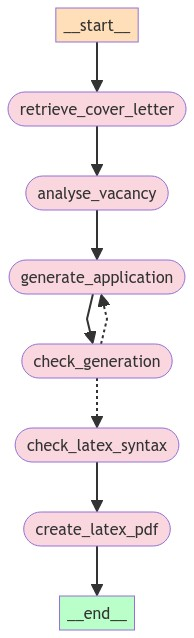

In [ ]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import END, StateGraph

# Initialize the graph
work_flow = StateGraph(GraphState)

# Define the nodes
work_flow.add_node("retrieve_cover_letter", retrieve_cover_letter)  # retrieve cover letter
work_flow.add_node("analyse_vacancy", generate_vacancy_analysis)  # analyse vacancy
work_flow.add_node("generate_application", generate_application)  # generation solution
work_flow.add_node("check_generation", check_generation)  # check generation
work_flow.add_node("check_latex_syntax", check_latex_syntax)  # check LaTeX syntax
work_flow.add_node("create_latex_pdf", create_latex_pdf)  # create LaTeX PDF

# Build graph
work_flow.set_entry_point("retrieve_cover_letter")
work_flow.add_edge("retrieve_cover_letter", "analyse_vacancy")
work_flow.add_edge("analyse_vacancy", "generate_application")
work_flow.add_edge("generate_application", "check_generation")
work_flow.add_conditional_edges("check_generation", decide_to_finish,
    {
        "check_latex_syntax": "check_latex_syntax",
        "generate_application": "generate_application",
    },
)
work_flow.add_edge("check_latex_syntax", "create_latex_pdf")  # Correct edge to finish point
work_flow.set_finish_point("create_latex_pdf")

# Set up the memory and compile the graph
memory = SqliteSaver.from_conn_string(":memory:")
graph = work_flow.compile(checkpointer=None)

# Display the graph
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception as e:
    print(f"Error displaying the graph: {e}")


In [ ]:
from pprint import pprint
# thread_id = str(uuid.uuid4())
config = {
    "configurable": {
        # Checkpoints are accessed by thread_id
        "thread_id": unique_id,
    }
}

for output in graph.stream({'messages': ['job_position', query_for_search], 'iterations': 0}, config=config, stream_mode='values'):
    # 
    for key, value in output.items():
        if key == "iterations":
            pprint(f"Node: Iterations' '{value}' ")

        
    pprint("-------------TOTAL END----------------")


"Node: Iterations' '0' "
'-------------TOTAL END----------------'
"Node: Iterations' '0' "
'-------------TOTAL END----------------'
------ Analysing vacancy ------
------ VACANCY ANALYSIS COMPLETE ------
"Node: Iterations' '0' "
'-------------TOTAL END----------------'
------ Generating application ------
"Node: Iterations' '1' "
'-------------TOTAL END----------------'
---------------- CHECK GENERATION ----------------
---APPLICATION CHECK: START---
Invalid words in: motivation: Invalid words found: derived, facets, fostering, perfect, perfectly, prospect
INVALID WORDs:  ['Invalid words in motivation: Invalid words found: derived, facets, fostering, perfect, perfectly, prospect']
------------- MIN LENGTH ERROR -------------
------------- MAX LENGTH ERROR -------------
skills
------------- MAX LENGTH ERROR -------------
continued_learning
------------- MAX LENGTH ERROR -------------
thank_you
---DECISION: RE-TRY SOLUTION---
"Node: Iterations' '1' "
'-------------TOTAL END--------------

In [ ]:
# temp = output['cover_letter_template']

# test = output['messages']
# for i in test:
#     print(i)

test1 = output['generation']
for i in test1:
    print(i)

for i in test1:
    print(i[0],len(i[1]))

semilarity_document_template
                    

('company_name', 'Danica Pension')
('job_title', 'Data Scientist')
('motivation', "I am excited about the opportunity to join Danica Pension as a Data Scientist. My passion for data science is driven by the satisfaction of transforming complex data into actionable insights. I am particularly drawn to this role because it aligns with my career goals of leveraging data to drive strategic decisions and improve business outcomes. My academic background in Data Science ICT, combined with my hands-on experience in data analysis, machine learning, and predictive modeling, positions me well to contribute effectively to your team.\n\nI am confident in my ability to deliver valuable insights to management, identify new data sources, and drive data visualization projects. My strong background in SQL, Python, and Tableau, along with my experience in data analysis and visualization, will enable me to excel in this role. Additionally, my ability to communicate complex analysis results to non-technic

[(Document(page_content="Project Manager\n\nMotivation I am driven to progress in the field of IT project management, particularly focusing on streamlining processes, optimizing resource allocation, and ensuring timely delivery of high-quality projects. My goal is to implement efficient project management methodologies backed by solid data and effective communication. I am dedicated to establishing thorough project plans and agreements to support these efforts and am excited about the prospect of working alongside your team.\n\nMy interest in project management is motivated by genuine curiosity and the satisfaction derived from successfully managing complex projects across various domains within IT. Whether working independently or as part of a team, I am committed to addressing every necessary element to deliver a well-rounded IT solution, including aspects of security and compliance with GDPR and other relevant regulations. I am positive about engaging in an environment that encourag